In [1]:
import pandas as pd


In [2]:
A=pd.read_csv("/content/netflix_titles.csv.zip")

In [4]:
A.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Exploratory Data Analysis

In [7]:
A.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
A=A.drop(labels=["director"],axis=1)
A=A.drop(labels=["cast"],axis=1)
A=A.drop(labels=["country"],axis=1)   #huge number of null values here so drop them

In [9]:
A.isna().sum()

show_id          0
type             0
title            0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

Does netflix have more TV Shows or Movies?

In [11]:
A.nunique()

show_id         8807
type               2
title           8807
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [13]:
A["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb

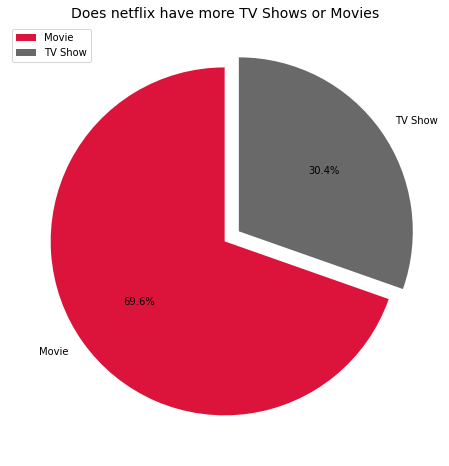

In [18]:
percent=A["type"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(percent.values,labels=percent.index,autopct="%.1f%%",startangle=90,explode=[0,0.1],colors=["crimson","dimgrey"])
plt.legend()
plt.title("Does netflix have more TV Shows or Movies",fontsize=14)
plt.show()


In [21]:
type_and_date=A[["type","date_added"]].copy()
type_and_date["date_added"]=pd.to_datetime(type_and_date["date_added"])
type_and_date["year_added"]=pd.DatetimeIndex(type_and_date["date_added"]).year
type_and_date

,type,date_added,year_added
0,Movie,2021-09-25,2021.0
1,TV Show,2021-09-24,2021.0
2,TV Show,2021-09-24,2021.0
3,TV Show,2021-09-24,2021.0
4,TV Show,2021-09-24,2021.0
...,...,...,...
8802,Movie,2019-11-20,2019.0
8803,TV Show,2019-07-01,2019.0
8804,Movie,2019-11-01,2019.0
8805,Movie,2020-01-11,2020.0


In [22]:
type_and_date.isna().sum()

type           0
date_added    10
year_added    10
dtype: int64

In [23]:
type_and_date.dropna(inplace=True)

In [25]:
type_and_date.isna().sum()

type          0
date_added    0
year_added    0
dtype: int64

In [28]:
type_and_date["year_added"].unique()

array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2009., 2008., 2010.])

In [30]:
B=type_and_date.groupby(["type","year_added"]).count().rename(columns={"date_added":"Number of shows and Movies"})
B.reset_index(inplace=True)

In [31]:
B

,type,year_added,Number of shows and Movies
0,Movie,2008.0,1
1,Movie,2009.0,2
2,Movie,2010.0,1
3,Movie,2011.0,13
4,Movie,2012.0,3
5,Movie,2013.0,6
6,Movie,2014.0,19
7,Movie,2015.0,56
8,Movie,2016.0,253
9,Movie,2017.0,839


In [35]:
count_TVshow=B[B["type"]=="TV Show"]

In [36]:
count_TVshow

,type,year_added,Number of shows and Movies
14,TV Show,2008.0,1
15,TV Show,2013.0,5
16,TV Show,2014.0,5
17,TV Show,2015.0,26
18,TV Show,2016.0,176
19,TV Show,2017.0,349
20,TV Show,2018.0,412
21,TV Show,2019.0,592
22,TV Show,2020.0,595
23,TV Show,2021.0,505


In [37]:
count_movies=B[B["type"]=="Movie"]

In [38]:
count_movies

,type,year_added,Number of shows and Movies
0,Movie,2008.0,1
1,Movie,2009.0,2
2,Movie,2010.0,1
3,Movie,2011.0,13
4,Movie,2012.0,3
5,Movie,2013.0,6
6,Movie,2014.0,19
7,Movie,2015.0,56
8,Movie,2016.0,253
9,Movie,2017.0,839


Text(0.5, 1.0, 'Count of TV Show and Movie Based On The Year They Are Added')

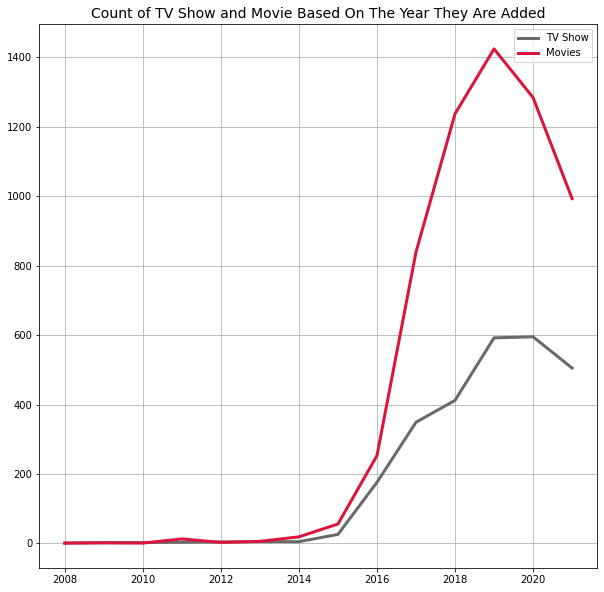

In [41]:
plt.figure(figsize=(10,10))
plt.plot(count_TVshow["year_added"],count_TVshow["Number of shows and Movies"],linewidth=3,color="dimgrey",label="TV Show")
plt.plot(count_movies["year_added"],count_movies["Number of shows and Movies"],linewidth=3,color="crimson",label="Movies")
plt.legend()
plt.grid()
plt.title("Count of TV Show and Movie Based On The Year They Are Added",fontsize=14)

use cumsum here its works on successive elements in the columns of A and returns the cumulative sums of each column.

In [44]:
comulative_TVshow=count_TVshow.groupby("type").cumsum().drop(columns=["year_added"])
comulative_TVshow

,Number of shows and Movies
14,1
15,6
16,11
17,37
18,213
19,562
20,974
21,1566
22,2161
23,2666


In [46]:
comulative_Movie=count_movies.groupby("type").cumsum().drop(columns=["year_added"])
comulative_Movie

,Number of shows and Movies
0,1
1,3
2,4
3,17
4,20
5,26
6,45
7,101
8,354
9,1193


Text(0.5, 1.0, 'Cumulative Count of TV Show and Movie Based On The Year They Are Added')

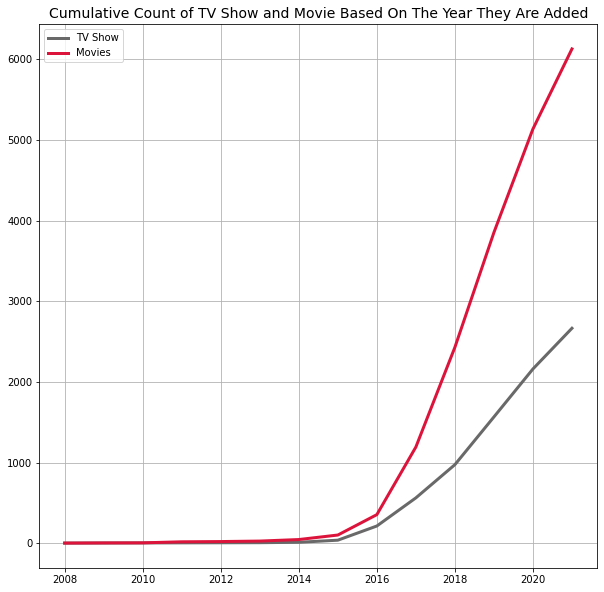

In [49]:
plt.figure(figsize=(10,10))
plt.plot(count_TVshow["year_added"],comulative_TVshow["Number of shows and Movies"],linewidth=3,color="Dimgrey",label="TV Show")
plt.plot(count_movies["year_added"],comulative_Movie["Number of shows and Movies"],linewidth=3,color="crimson",label="Movies")
plt.legend()
plt.grid()
plt.title("Cumulative Count of TV Show and Movie Based On The Year They Are Added",fontsize=14)

Ratings on Netflix

Text(0.5, 1.0, 'Number of TV Show and Movies based on Rating')

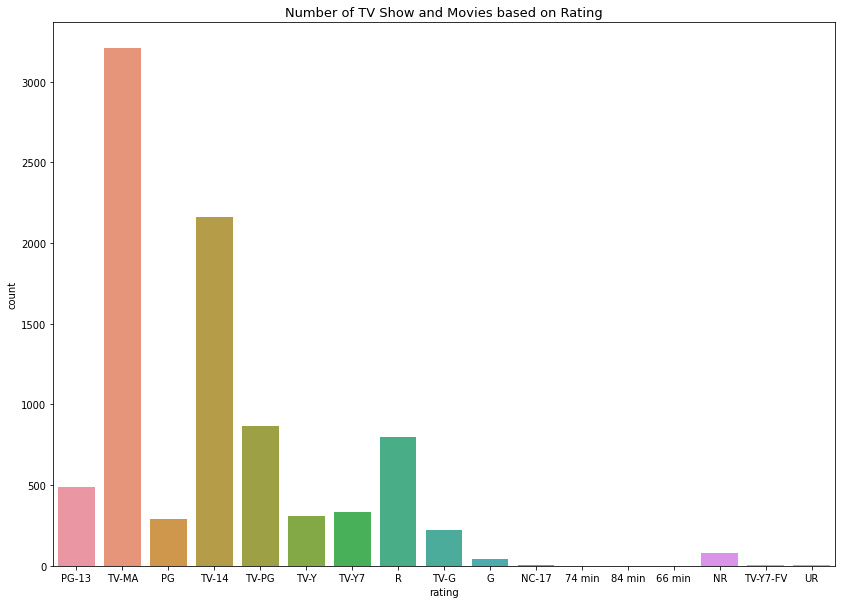

In [52]:
plt.figure(figsize=(14,10))
sb.countplot(x="rating",data=A)
plt.title("Number of TV Show and Movies based on Rating",fontsize=13)

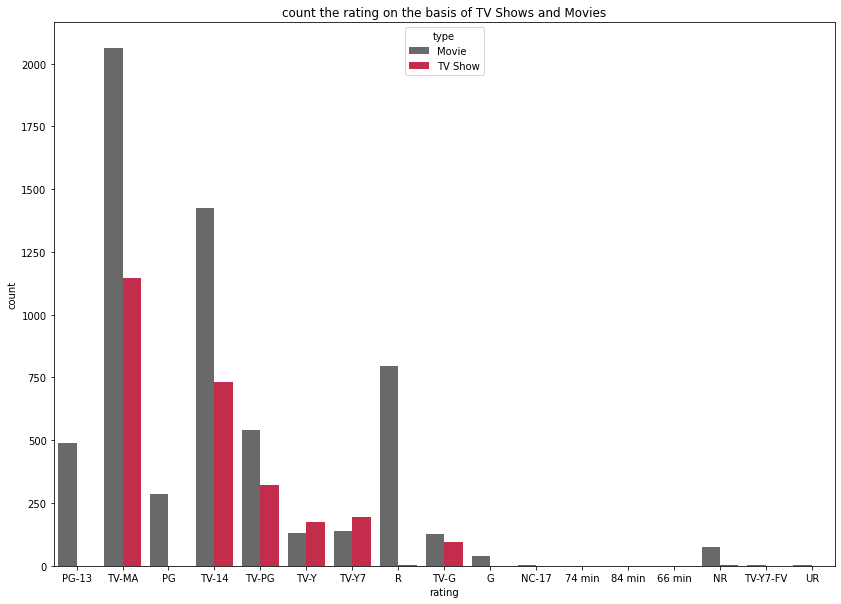

In [53]:
plt.figure(figsize=(14,10))
plt.title("count the rating on the basis of TV Shows and Movies",fontsize=12)
sb.countplot(x="rating",data=A,hue="type",palette=["dimgrey","crimson"])

FRom the oldest to the Newest

Top oldest and newest movies on netflix

In [60]:
A.sort_values("release_year",ascending=True)[["title","date_added","release_year"]].head()

,title,date_added,release_year
4250,Pioneers: First Women Filmmakers*,"December 30, 2018",1925
7790,Prelude to War,"March 31, 2017",1942
8205,The Battle of Midway,"March 31, 2017",1942
8660,Undercover: How to Operate Behind Enemy Lines,"March 31, 2017",1943
8739,Why We Fight: The Battle of Russia,"March 31, 2017",1943


In [61]:
A.sort_values("release_year",ascending=False)[["title","date_added","release_year"]].head()

,title,date_added,release_year
693,Ali & Ratu Ratu Queens,"June 17, 2021",2021
781,Black Holes | The Edge of All We Know,"June 2, 2021",2021
762,Sweet & Sour,"June 4, 2021",2021
763,Sweet Tooth,"June 4, 2021",2021
764,Trippin' with the Kandasamys,"June 4, 2021",2021


In [62]:
A

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Countries and Title

In [67]:
countries=pd.read_csv("/content/netflix_titles.csv.zip")

In [65]:
countries

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [71]:
countries["country"].unique()[0]

'United States'

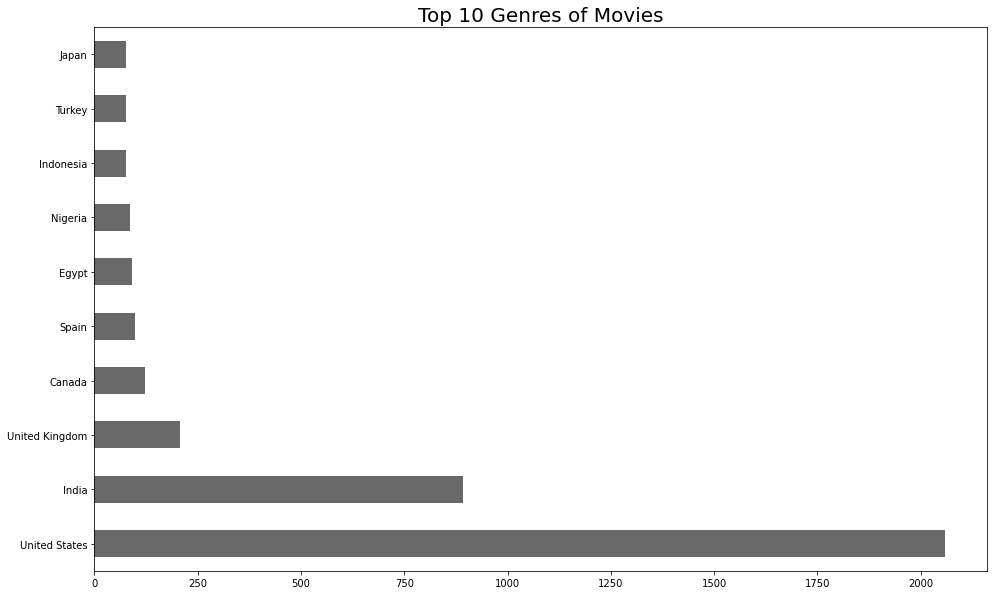

In [72]:
plt.figure(figsize=(16,10))
plt.title("Top 10 Genres of Movies", fontsize=20)
countries[countries["type"]=="Movie"]["country"].value_counts()[:10].plot(kind="barh", color='dimgrey');

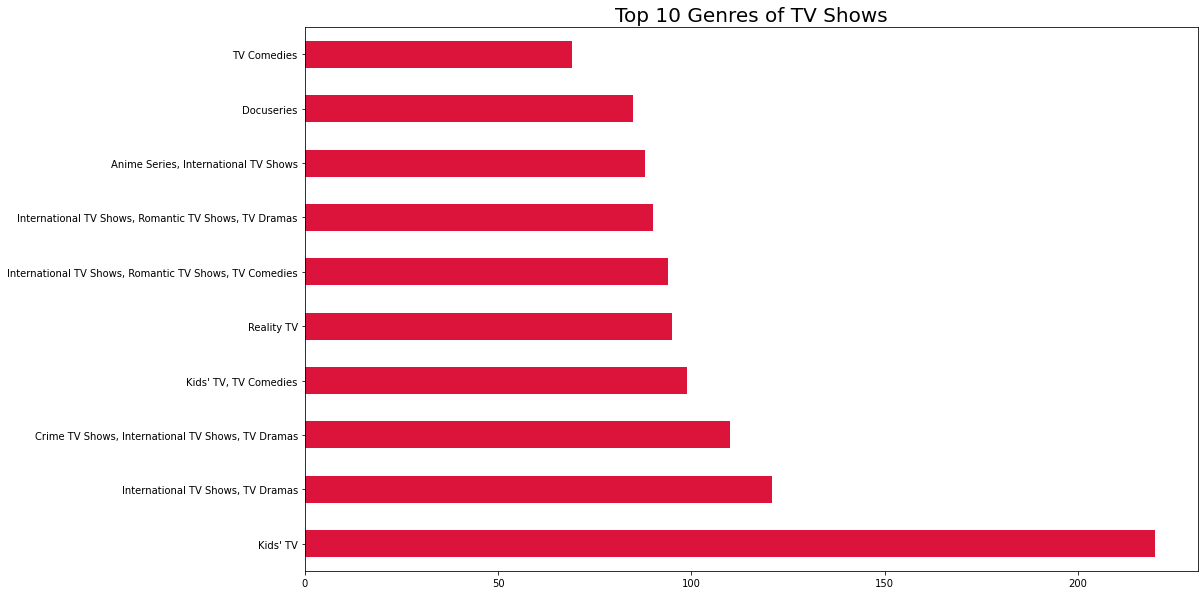

In [73]:
plt.figure(figsize=(16,10))
plt.title("Top 10 Genres of TV Shows", fontsize=20)
countries[countries["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh", color='crimson');

In [74]:
from wordcloud import WordCloud

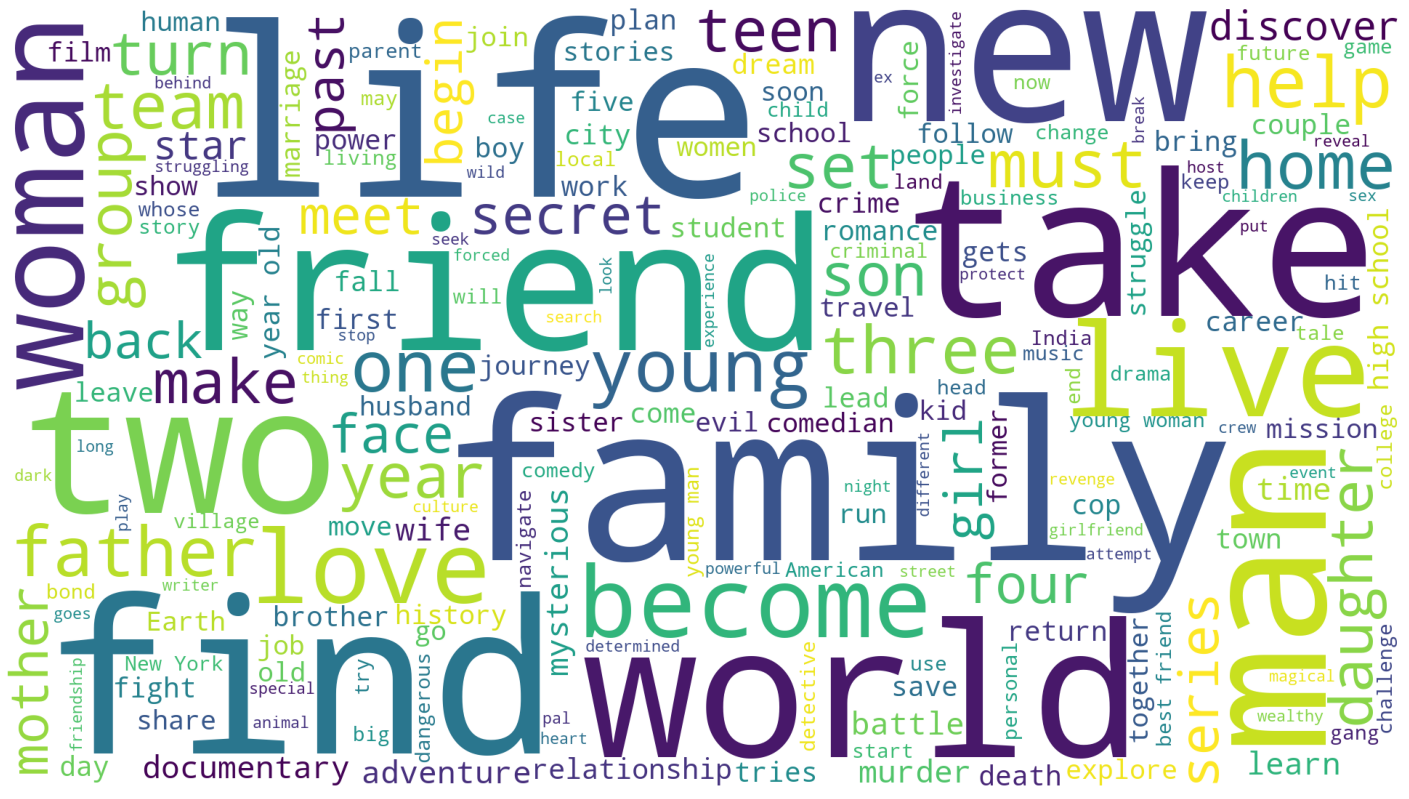

In [75]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='White',
                          width=1920,
                          height=1080
                         ).generate(" ".join(countries.description))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()